<a href="https://colab.research.google.com/github/Oanh0305/CSCA-5642_final_project/blob/main/Traffic_Signs_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Traffic Signs image classification

## 1. Description of the problem and the data

* Dataset


The German Traffic Sign Benchmark is a multi-class, single-image classification challenge held at the International Joint Conference on Neural Networks (IJCNN) 2011.

The train dataset contains 39,209 entries, the test dataset contains 12,630 entries, and both belong to 43 classes.

* Problem

Single-image, multi-class classification problem
More than 40 classes
More than 50,000 images in total
Large, lifelike database.

In [2]:

import numpy as np
import pandas as pd
import tensorflow as tf
import os

import cv2
from PIL import Image

from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

import time
import datetime

In [ ]:
! ls /content/drive/MyDrive/TraficSign

Meta  Meta.csv	Test  Test.csv	Train  Train.csv


## 2. Load in, Inspect, Visualize and Clean the Data

Load in data

In [3]:
train_df = pd.read_csv('/content/drive/MyDrive/TraficSign/Train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/TraficSign/Test.csv')

In [23]:
train_df

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png
...,...,...,...,...,...,...,...,...
39204,52,56,5,6,47,51,42,Train/42/00042_00007_00025.png
39205,56,58,5,5,51,53,42,Train/42/00042_00007_00026.png
39206,58,62,5,6,53,57,42,Train/42/00042_00007_00027.png
39207,63,69,5,7,58,63,42,Train/42/00042_00007_00028.png


In [5]:
train_df.describe()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId
count,39209.000000,39209.000000,39209.000000,39209.000000,39209.000000,39209.000000,39209.000000
mean,50.835880,50.328930,5.999515,5.962381,45.197302,44.728379,15.788390
std,24.306933,23.115423,1.475493,1.385440,23.060157,21.971145,12.013238
min,25.000000,25.000000,0.000000,5.000000,20.000000,20.000000,0.000000
25%,35.000000,35.000000,5.000000,5.000000,29.000000,30.000000,5.000000
50%,43.000000,43.000000,6.000000,6.000000,38.000000,38.000000,12.000000
75%,58.000000,58.000000,6.000000,6.000000,53.000000,52.000000,25.000000
max,243.000000,225.000000,20.000000,20.000000,223.000000,205.000000,42.000000


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39209 entries, 0 to 39208
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Width    39209 non-null  int64 
 1   Height   39209 non-null  int64 
 2   Roi.X1   39209 non-null  int64 
 3   Roi.Y1   39209 non-null  int64 
 4   Roi.X2   39209 non-null  int64 
 5   Roi.Y2   39209 non-null  int64 
 6   ClassId  39209 non-null  int64 
 7   Path     39209 non-null  object
dtypes: int64(7), object(1)
memory usage: 2.4+ MB


In [22]:
test_df

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png
...,...,...,...,...,...,...,...,...
12625,42,41,5,6,37,36,12,Test/12625.png
12626,50,51,6,5,45,46,33,Test/12626.png
12627,29,29,6,6,24,24,6,Test/12627.png
12628,48,49,5,6,43,44,7,Test/12628.png


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12630 entries, 0 to 12629
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Width    12630 non-null  int64 
 1   Height   12630 non-null  int64 
 2   Roi.X1   12630 non-null  int64 
 3   Roi.Y1   12630 non-null  int64 
 4   Roi.X2   12630 non-null  int64 
 5   Roi.Y2   12630 non-null  int64 
 6   ClassId  12630 non-null  int64 
 7   Path     12630 non-null  object
dtypes: int64(7), object(1)
memory usage: 789.5+ KB


In [ ]:
train_df['ClassId'].unique()

array([20,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42])

Check duplicated values

In [24]:
train_df[train_df.duplicated(keep=False)]

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path


In [25]:
test_df[test_df.duplicated(keep=False)]

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path


Histogram of ClassId column of the train data.

<Axes: xlabel='ClassId', ylabel='Count'>

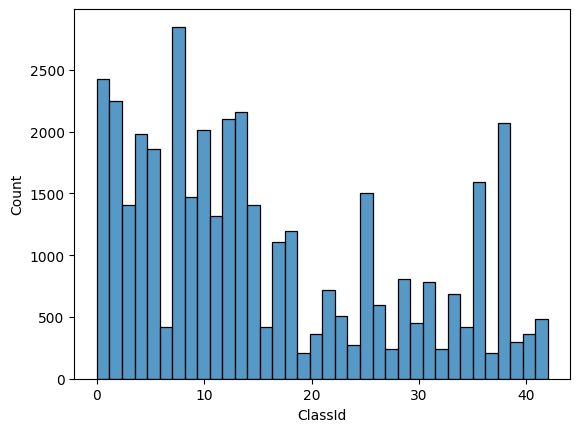

In [17]:
sns.histplot(train_df['ClassId'])

Some helper functions

In [11]:
def plot_performance(history=None, figure_directory=None, ylim_pad=[0, 0]):
    xlabel = 'Epoch'
    legends = ['Training', 'Validation']

    plt.figure(figsize=(20, 5))

    y1 = history.history['accuracy']
    y2 = history.history['val_accuracy']

    min_y = min(min(y1), min(y2))-ylim_pad[0]
    max_y = max(max(y1), max(y2))+ylim_pad[0]


    plt.subplot(121)

    plt.plot(y1)
    plt.plot(y2)
    plt.title('Model Accuracy\n'+date_time(1), fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Accuracy', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()

    y1 = history.history['loss']
    y2 = history.history['val_loss']

    min_y = min(min(y1), min(y2))-ylim_pad[1]
    max_y = max(max(y1), max(y2))+ylim_pad[1]


    plt.subplot(122)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Loss\n'+date_time(1), fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Loss', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()
    if figure_directory:
        plt.savefig(figure_directory+"/history")

    plt.show()

In [12]:
# date_time function

def date_time(x):
  if x==1:
      return 'Timestamp: {:%Y-%m-%d %H:%M:%S}'.format(datetime.datetime.now())
  if x==2:
      return 'Timestamp: {:%Y-%b-%d %H:%M:%S}'.format(datetime.datetime.now())
  if x==3:
      return 'Date now: %s' % datetime.datetime.now()
  if x==4:
      return 'Date today: %s' % datetime.date.today()

Randomly gennerate some noises for data to prevent overfitting

In [7]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(rescale=1./255)
val_generator = ImageDataGenerator(rescale=1./255)
test_generator = ImageDataGenerator(rescale=1./255)

Split train data to train data and validation data

In [8]:

train_data, val_data = train_test_split(train_df, test_size = 0.2, random_state = 42, stratify=train_df['ClassId'])
train_data = train_data.astype(str)
val_data = val_data.astype(str)
print(train_data.shape, val_data.shape)

(31367, 8) (7842, 8)


In [9]:
train_data['ClassId'] = train_data['ClassId'].astype(str)
val_data['ClassId'] = val_data['ClassId'].astype(str)
test_df['ClassId'] = test_df['ClassId'].astype(str)

In [10]:
train_data_gen = train_generator.flow_from_dataframe(dataframe = train_data, directory = '/content/drive/MyDrive/TraficSign/', x_col = 'Path', y_col = 'ClassId', target_size = (96,96), class_mode = 'categorical', batch_size = 32)
test_data_gen = test_generator.flow_from_dataframe(dataframe = test_df, directory = '/content/drive/MyDrive/TraficSign/', x_col = 'Path', y_col = 'ClassId', target_size = (96,96), class_mode = 'categorical', batch_size = 32)
val_data_gen = val_generator.flow_from_dataframe(dataframe = val_data, directory = '/content/drive/MyDrive/TraficSign/', x_col = 'Path', y_col = 'ClassId', target_size = (96,96), class_mode = 'categorical', batch_size = 32)

Found 31367 validated image filenames belonging to 43 classes.
Found 12630 validated image filenames belonging to 43 classes.
Found 7842 validated image filenames belonging to 43 classes.


## 3. Model Architecture

* Creating and Compiling the first Model

In [68]:
# Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=(96,96,3)))
model.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.15))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.20))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(43, activation='softmax'))

# Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Model display
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 92, 92, 32)        2432      
                                                                 
 conv2d_4 (Conv2D)           (None, 88, 88, 64)        51264     
                                                                 
 max_pooling2d (MaxPooling2  (None, 44, 44, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 44, 44, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 42, 42, 128)       73856     
                                                                 
 conv2d_6 (Conv2D)           (None, 40, 40, 256)       295168    
                                                      

Training the Model

In [70]:
# Training the Model

history1 = model.fit(train_data_gen, validation_data = val_data_gen, epochs = 25, validation_steps=int(len(val_data)/32))

Epoch 1/25
981/981 [==============================] - 97s 98ms/step - loss: 0.4033 - accuracy: 0.8802 - val_loss: 0.1044 - val_accuracy: 0.9712
Epoch 2/25
981/981 [==============================] - 94s 95ms/step - loss: 0.1139 - accuracy: 0.9665 - val_loss: 0.0710 - val_accuracy: 0.9827
Epoch 3/25
981/981 [==============================] - 92s 94ms/step - loss: 0.0661 - accuracy: 0.9807 - val_loss: 0.0532 - val_accuracy: 0.9872
Epoch 4/25
981/981 [==============================] - 93s 95ms/step - loss: 0.0589 - accuracy: 0.9820 - val_loss: 0.0571 - val_accuracy: 0.9858
Epoch 5/25
981/981 [==============================] - 92s 94ms/step - loss: 0.0435 - accuracy: 0.9871 - val_loss: 0.0498 - val_accuracy: 0.9888
Epoch 6/25
981/981 [==============================] - 92s 94ms/step - loss: 0.0436 - accuracy: 0.9873 - val_loss: 0.0527 - val_accuracy: 0.9879
Epoch 7/25
981/981 [==============================] - 93s 95ms/step - loss: 0.0308 - accuracy: 0.9909 - val_loss: 0.0573 - val_accuracy:

Visualizing the performance of the Model during Training Phase

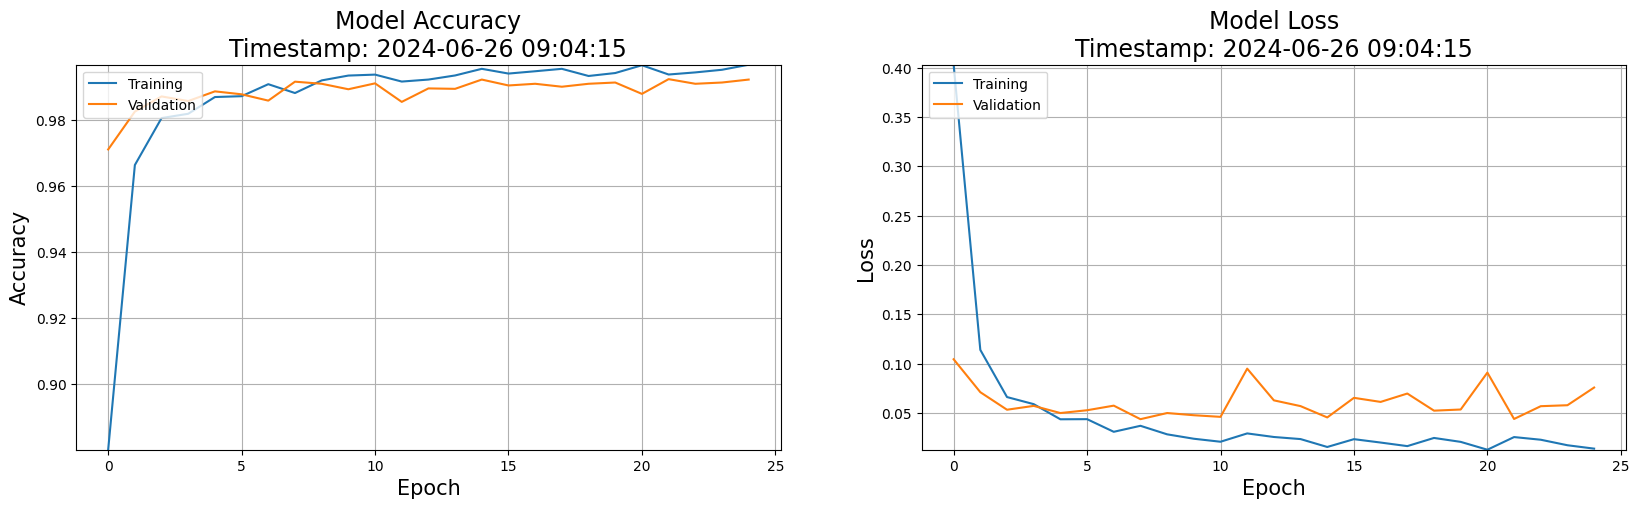

In [71]:
plot_performance(history=history1)

Evaluating the first model

In [72]:
model.evaluate(test_data_gen)

395/395 [==============================] - 30s 76ms/step - loss: 0.4679 - accuracy: 0.9567


[0.4678771197795868, 0.9566904306411743]

 Saving the Model

In [ ]:
# Saving the Model
model.save('/content/drive/MyDrive/TraficSign/classifier.keras')

* Sencond Model - VGG

In [20]:
from keras.applications.vgg16 import VGG16

model_vgg=VGG16(weights='imagenet',include_top=False)
model_vgg.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_vgg.summary()

58889256/58889256 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                              

In [9]:
history2 = model_vgg.fit(train_data_gen, validation_data = val_data_gen, epochs = 6, validation_steps=int(len(val_data)/32))

Epoch 1/6
981/981 [==============================] - 28238s 29s/step - loss: 1.1243 - accuracy: 0.6896 - val_loss: 0.6720 - val_accuracy: 0.8256
Epoch 2/6
981/981 [==============================] - 93s 95ms/step - loss: 0.5329 - accuracy: 0.8611 - val_loss: 0.4683 - val_accuracy: 0.8731
Epoch 3/6
981/981 [==============================] - 92s 93ms/step - loss: 0.3789 - accuracy: 0.9046 - val_loss: 0.3920 - val_accuracy: 0.8927
Epoch 4/6
981/981 [==============================] - 93s 94ms/step - loss: 0.2965 - accuracy: 0.9258 - val_loss: 0.3174 - val_accuracy: 0.9115
Epoch 5/6
981/981 [==============================] - 92s 94ms/step - loss: 0.2424 - accuracy: 0.9413 - val_loss: 0.2639 - val_accuracy: 0.9277
Epoch 6/6
981/981 [==============================] - 92s 94ms/step - loss: 0.2036 - accuracy: 0.9513 - val_loss: 0.2320 - val_accuracy: 0.9380


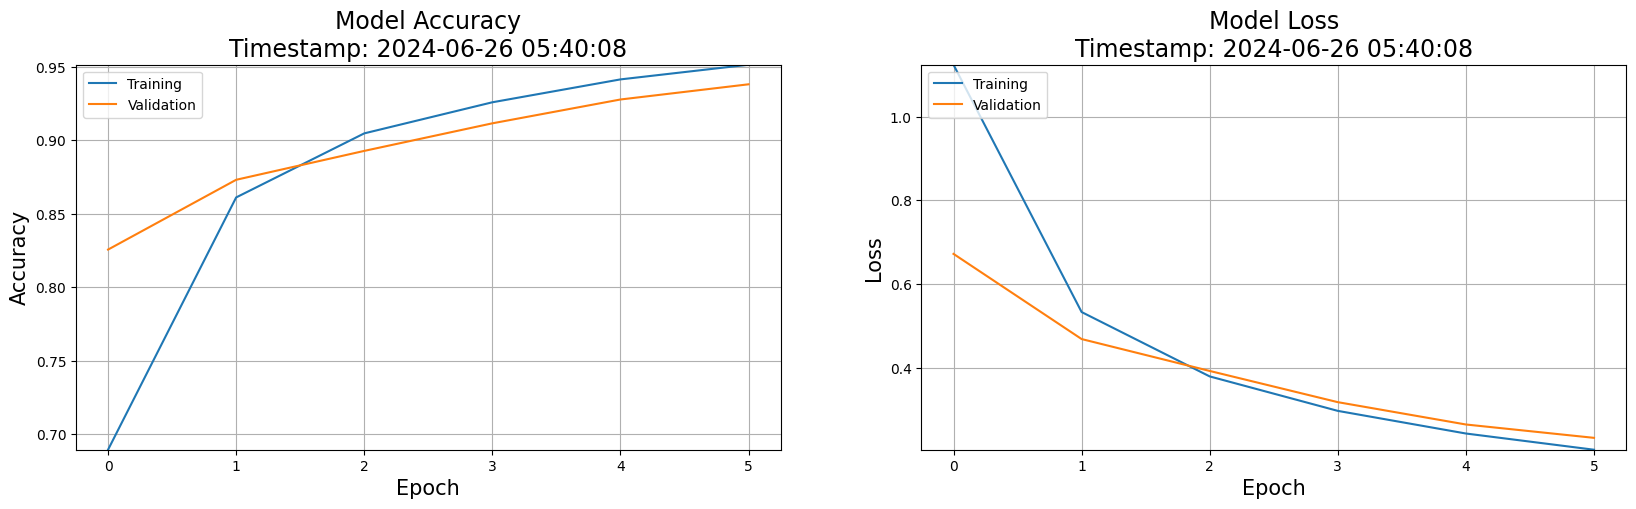

In [13]:
plot_performance(history=history2)

In [15]:
print(test_data_gen)


Save the second model - VGG

In [18]:
model_vgg.save('/content/drive/MyDrive/TraficSign/vgg_classifier.keras')

In [61]:
model_vgg.evaluate(test_data_gen)

395/395 [==============================] - 29s 74ms/step - loss: 0.9464 - accuracy: 0.7474


[0.9463865756988525, 0.7474267482757568]

4. Conclusion

* The first model achieved its best result at epoch 22, with a validation loss of 0.0438 and a validation accuracy of 0.9925. This model also demonstrated strong performance on the test data, reaching an accuracy of 0.9567.

* For the second model, I utilized the VGG16 architecture for training.  The best results on the validation dataset were achieved with a validation loss of 0.2320 and a validation accuracy of 0.9380. The accuracy on the test dataset was 0.7474


* Due to the computational demands of VGG16, I limited training to 6 epochs, which may have prevented full convergence. This could explain the lower test accuracy compared to the simpler first model.  As our problem appears less complex, a simpler model like the first one might indeed be more efficient.